In [33]:
# these are the libraries used for this data analysis
import pandas as pd #this is useful for data structure, data cleaning and preprocessing and data exploration
import matplotlib.pyplot as plt # its useful for customization including the use of colors, line styles, labels, titles, legends, etc
import seaborn as sns # it is used for statistical data visualization


In [34]:
df = pd.read_csv("C:\\Users\\oluwa\\Downloads\\imdb_movies.csv.zip")

In [35]:
print(df.head())

                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                         

In [36]:
# the above dataset is a tabular data
# each row represents information about IMDB Movie

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
None


In [38]:
# Potential issues are as stated below 
# using .info() reveals that columns genre and crew have null cells
# column date_x is registered as a string
# column genre also contains some special characters and many genre seperated by delimeters

In [39]:
print(df.describe())

              score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min        0.000000  1.000000e+00  0.000000e+00
25%       59.000000  1.500000e+07  2.858898e+07
50%       65.000000  5.000000e+07  1.529349e+08
75%       71.000000  1.050000e+08  4.178021e+08
max      100.000000  4.600000e+08  2.923706e+09


In [40]:
# column score reveals that the minimum score given to a movie = 0 meaning that it could be 
# a typographical error or the movie is so poor
# in the budget column, it reveals that budget is 1 in a particular movie 
# so, this is more or less an outlier. Also for revenue, minimum is 0.


In [41]:
# Replace missing value with unknown

In [42]:
df['genre'] = df['genre'].fillna('Unknown')
df['crew'] = df['crew'].fillna('Unknown')

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10178 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10178 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
None


In [44]:
# convert column date_x to datetime
df['date_x'] = pd.to_datetime(df['date_x'])
print(df['date_x'])

0       2023-03-02
1       2022-12-15
2       2023-04-05
3       2023-01-05
4       2023-03-17
           ...    
10173   2016-12-28
10174   1990-08-24
10175   1990-12-21
10176   1995-07-11
10177   2020-07-20
Name: date_x, Length: 10178, dtype: datetime64[ns]


In [45]:
df.describe()


,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


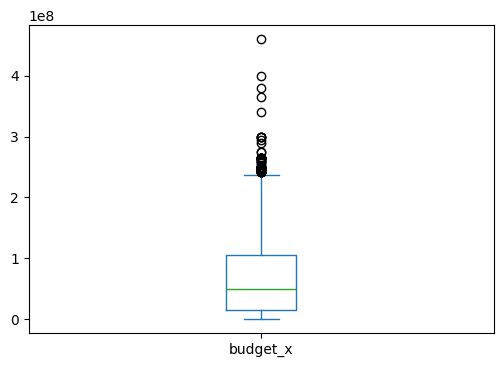

                                         names     date_x  score  \
1                     Avatar: The Way of Water 2022-12-15   78.0   
62                           Top Gun: Maverick 2022-05-26   83.0   
68                                      Avatar 2009-12-17   76.0   
76                     Spider-Man: No Way Home 2021-12-16   80.0   
89                     Jurassic World Dominion 2022-06-09   69.0   
...                                        ...        ...    ...   
9642                       Alice in Wonderland 1999-08-13   63.0   
9897               Female Market: Imprisonment 1986-01-18   49.0   
9914                  The Last Thing He Wanted 2020-02-14   49.0   
9969   Folklore: The Long Pond Studio Sessions 2020-11-25   86.0   
10046                                 Simulant 2023-06-02  100.0   

                                             genre  \
1               Science Fiction, Adventure, Action   
62                                   Action, Drama   
68     Action, Advent

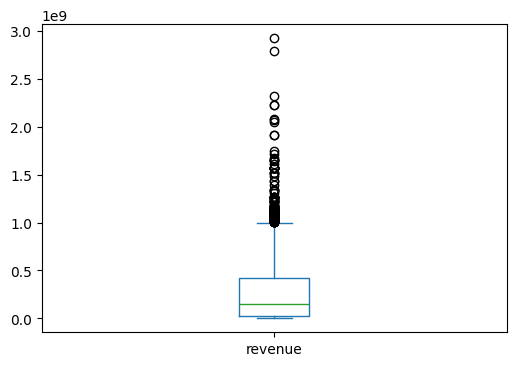

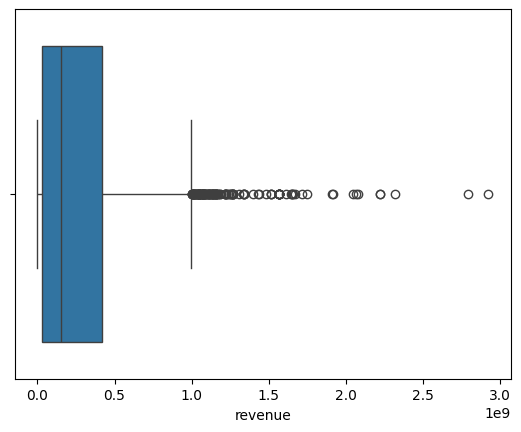

In [46]:
#check for outliers via visual inspection
df["budget_x"].plot(kind="box", figsize=(6,4))
plt.show()

#check for outliers via Summary Statistics (IQR method)
#Outliers = values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["revenue"] < lower_bound) | (df["revenue"] > upper_bound)]
print(outliers)

#check for outliers via visual inspection
df["revenue"].plot(kind="box", figsize=(6,4))
plt.show()

sns.boxplot(x=df["revenue"])
plt.show()


In [48]:
#Fixing Genre Split genre into multiple rows
df_genre = df.dropna(subset=["genre"]).copy()
df_genre["genre"] = df_genre["genre"].str.split(",\u00A0")  # split by comma + non-breaking space
# explode into separate rows
df_genre = df_genre.explode("genre")
# remove extra whitespace
df_genre["genre"] = df_genre["genre"].str.strip()

count         10178
unique         9660
top       Pinocchio
freq             12
Name: names, dtype: object
count     10178
unique     2304
top       Drama
freq        556
Name: genre, dtype: object


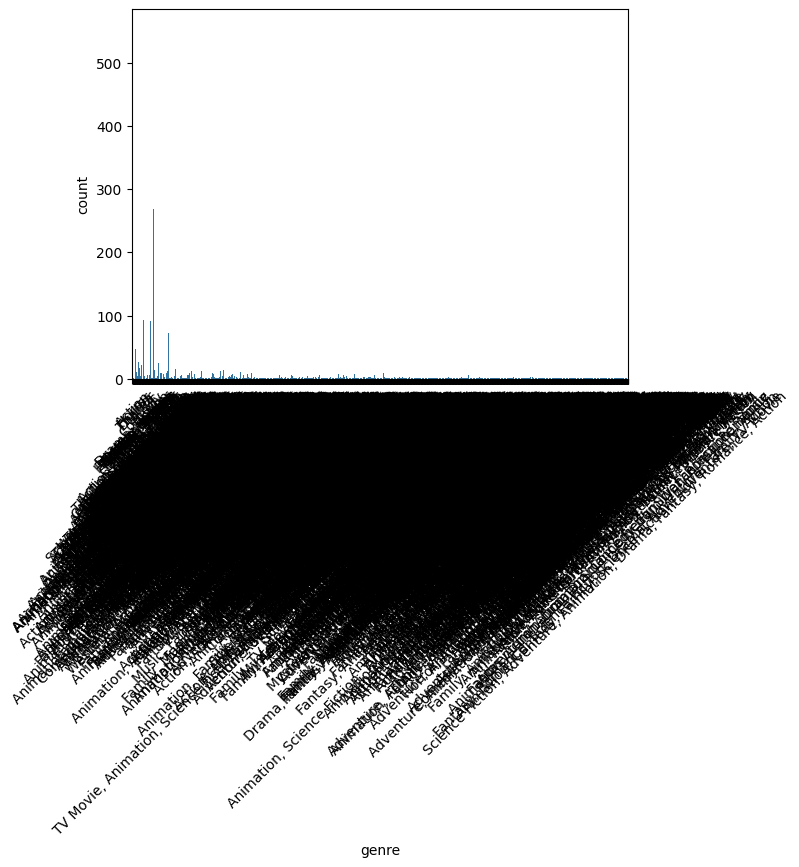

count    1.017800e+04
mean     2.531401e+08
std      2.777880e+08
min      0.000000e+00
25%      2.858898e+07
50%      1.529349e+08
75%      4.178021e+08
max      2.923706e+09
Name: revenue, dtype: float64


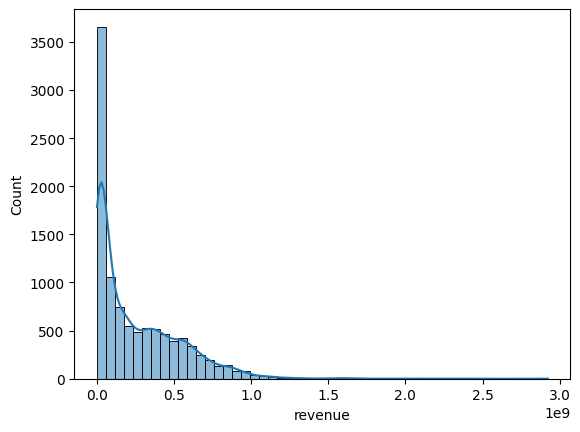

In [53]:
#univariate analysis for categorical column example
print(df['names'].describe())
print(df['genre'].describe())
sns.countplot(x="genre", data=df)
plt.xticks(rotation=45)
plt.show()

#univariate analysis for numerical column histogram
print(df['revenue'].describe())
sns.histplot(df["revenue"], bins=50, kde=True)
plt.show()


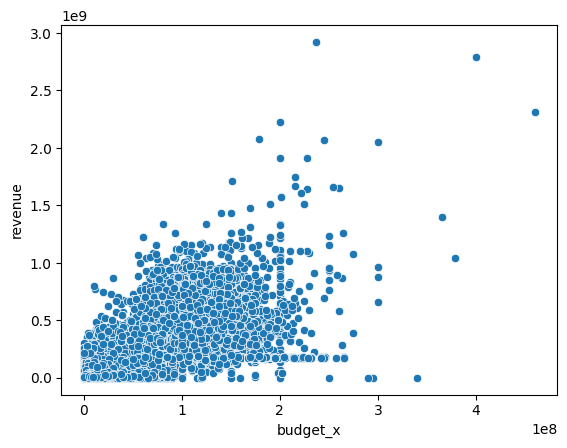

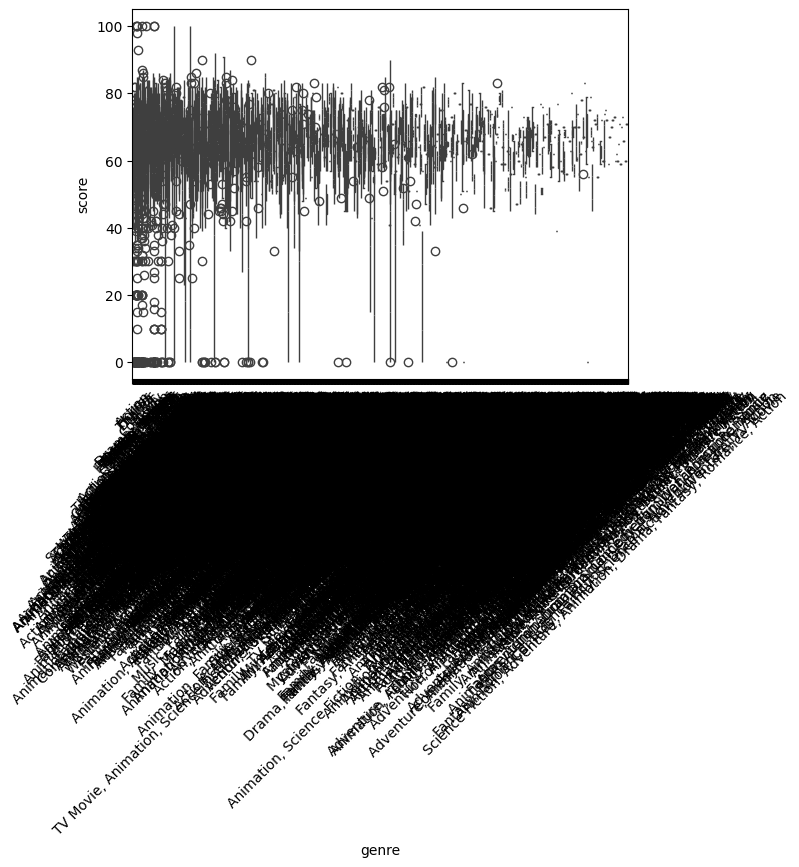

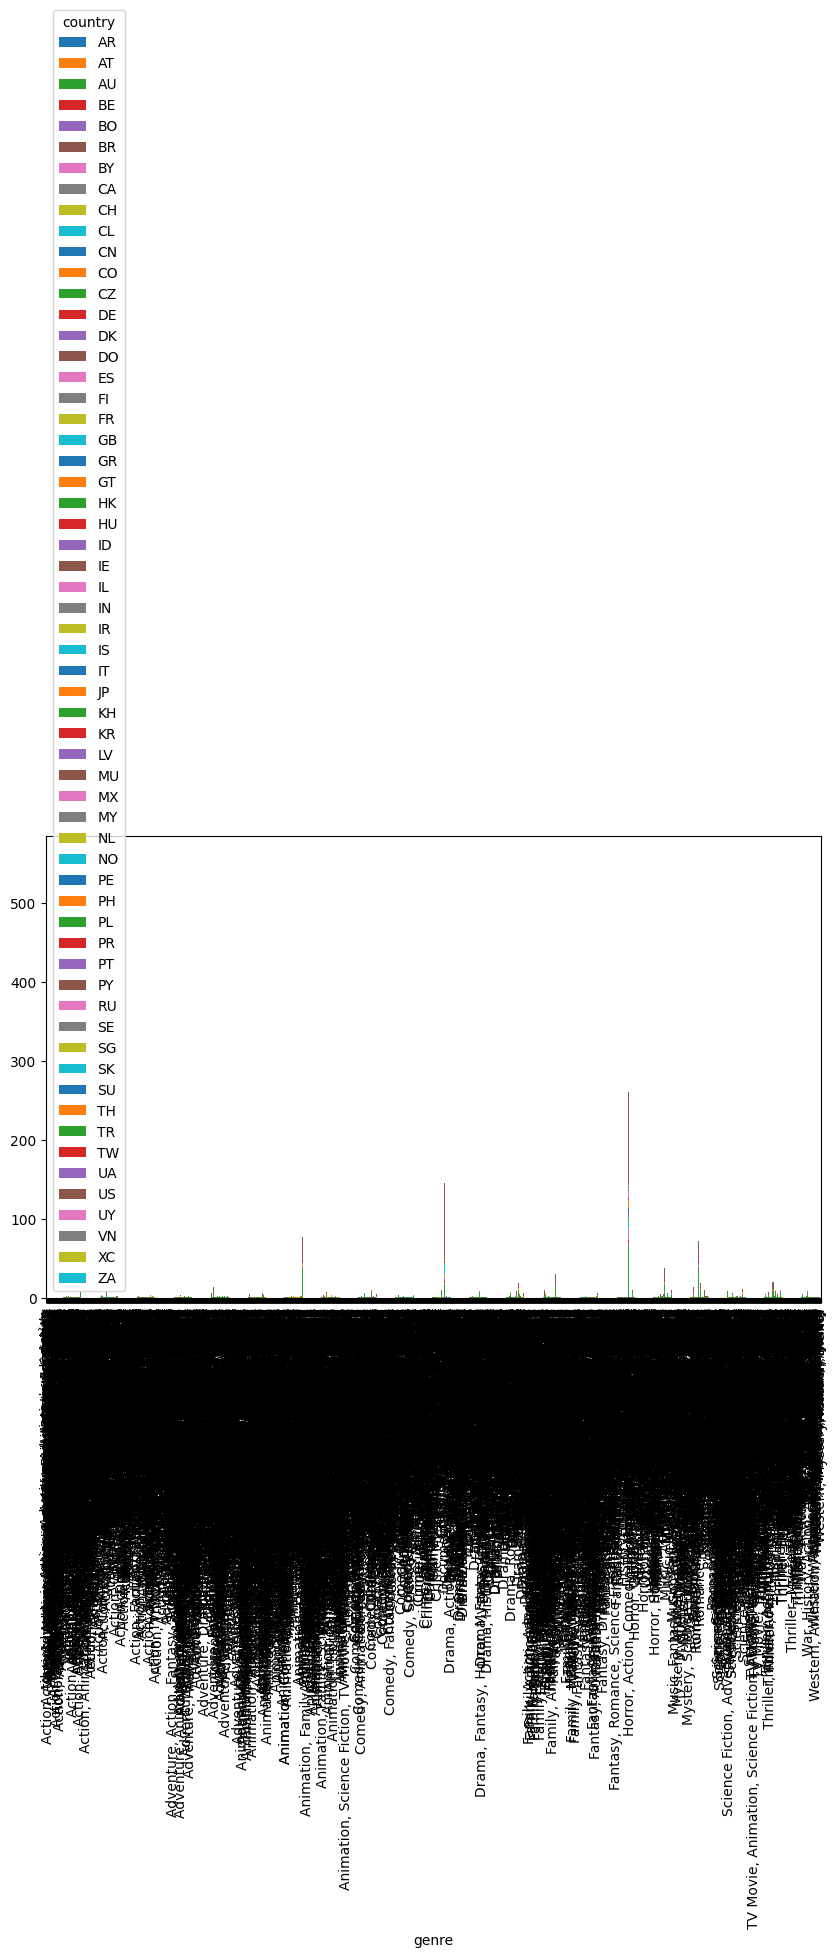

In [54]:
#bivariate analysis numerical vs numerical
sns.scatterplot(x="budget_x", y="revenue", data=df) #scatterplot
plt.show()

df[["budget_x", "revenue"]].corr() #High positive correlation means bigger budgets generally yield bigger revenues.

#bivariate numerical vs categorical
sns.boxplot(x="genre", y="score", data=df) #Helps see score distribution across genres.
plt.xticks(rotation=45)
plt.show()

#category vs category
pd.crosstab(df["genre"], df["country"])
pd.crosstab(df["genre"], df["country"]).plot(kind="bar", stacked=True, figsize=(10,6))
plt.show()

In [ ]:
# In this data we are unable to provide the relationship movie runtime 
# and ratings because we do not have enough information in the data set

C:\Users\oluwa\AppData\Local\Temp\ipykernel_13436\3304000756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="viridis")


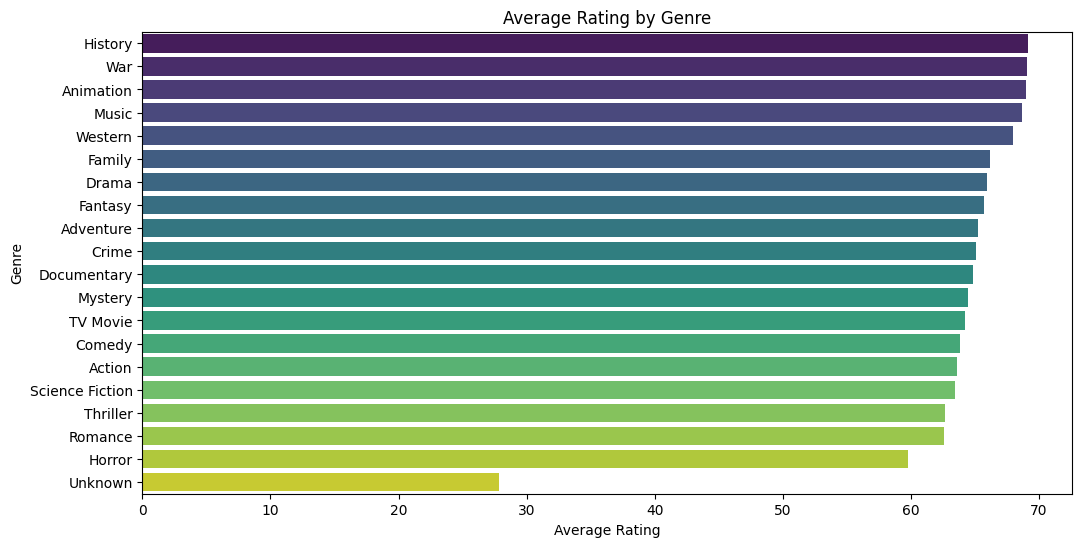

In [55]:
#Highest average rating per genre
avg_rating = df_genre.groupby("genre")["score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="viridis")
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

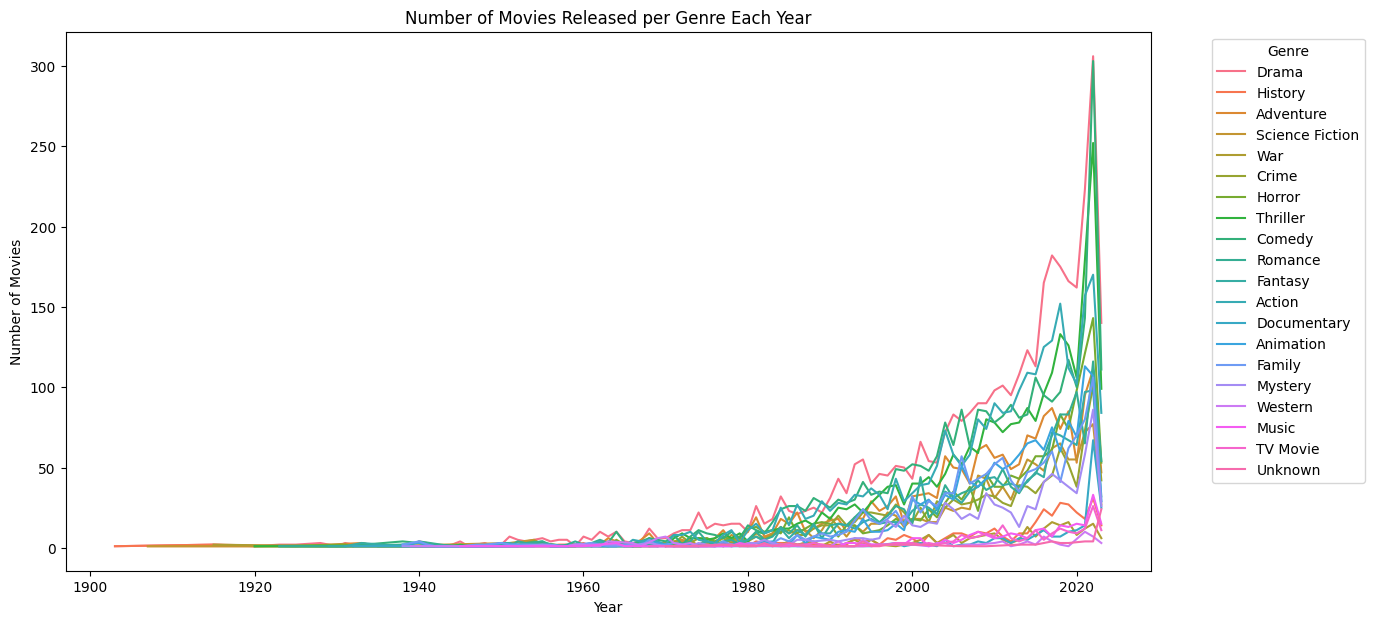

In [56]:
# Popularity of genre overtime
df_genre["date_x"] = pd.to_datetime(df_genre["date_x"], errors="coerce")
df_genre["year"] = df_genre["date_x"].dt.year
# Count movies per genre per year
genre_trend = df_genre.groupby(["year", "genre"]).size().reset_index(name="movie_count")
# Plot
plt.figure(figsize=(14,7))
sns.lineplot(x="year", y="movie_count", hue="genre", data=genre_trend)
plt.title("Number of Movies Released per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


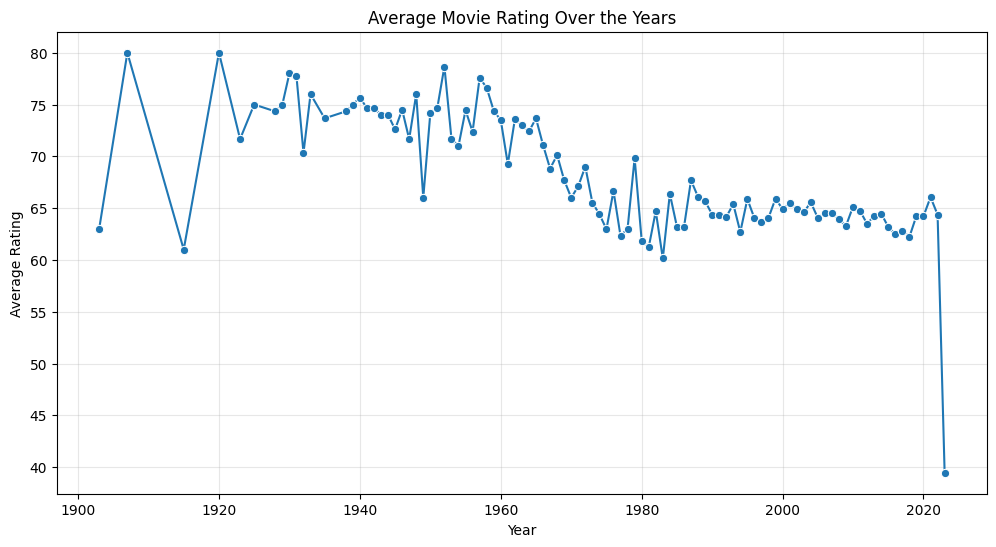

Highest number of releases: 2022 (954 movies)
Lowest number of releases: 1903 (1 movies)


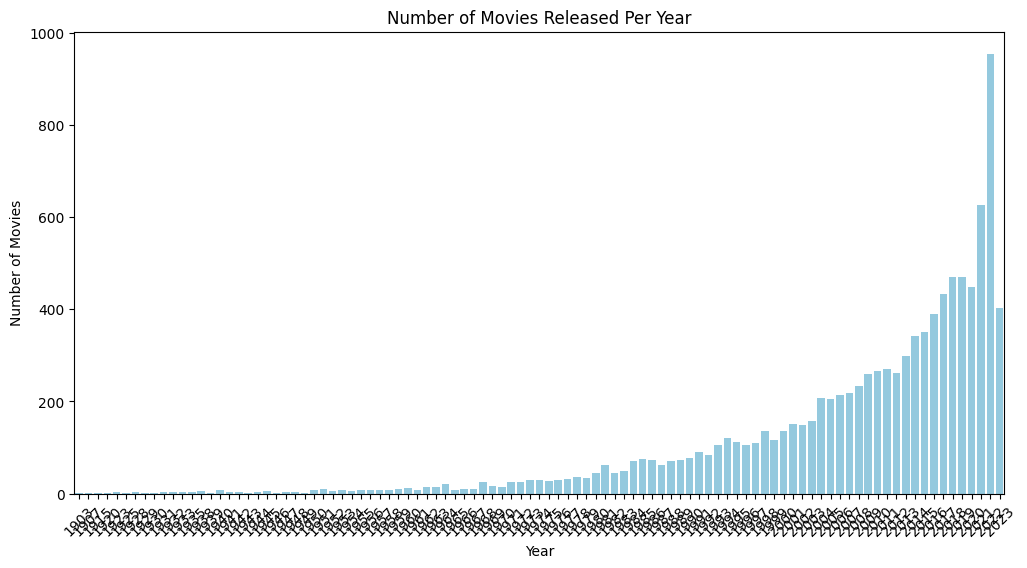

In [57]:
#Analyse trend over time
df["date_x"] = pd.to_datetime(df["date_x"], errors="coerce")
# extract year
df["year"] = df["date_x"].dt.year
# compute average rating per year
avg_rating_per_year = df.groupby("year")["score"].mean()
# plot
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker="o")
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True, alpha=0.3)
plt.show()
# count movies released each year
movie_count_per_year = df["year"].value_counts().sort_index()
# find peak and low years
highest_year = movie_count_per_year.idxmax()
lowest_year = movie_count_per_year.idxmin()
print(f"Highest number of releases: {highest_year} ({movie_count_per_year.max()} movies)")
print(f"Lowest number of releases: {lowest_year} ({movie_count_per_year.min()} movies)")
# plot
plt.figure(figsize=(12,6))
sns.barplot(x=movie_count_per_year.index, y=movie_count_per_year.values, color="skyblue")
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

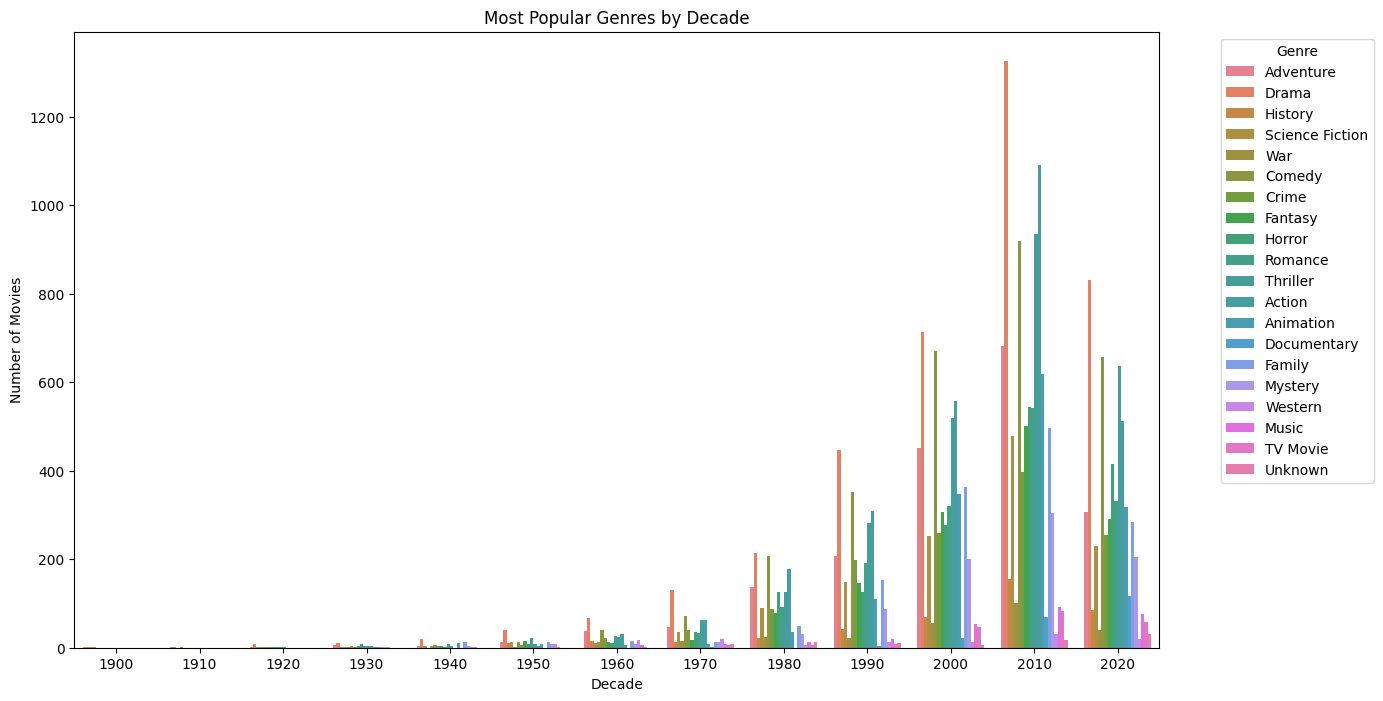

In [58]:
#Genre most popular by decade
df["date_x"] = pd.to_datetime(df["date_x"], errors="coerce")
df["year"] = df["date_x"].dt.year
df["decade"] = (df["year"] // 10) * 10
# Handle multi-genre splitting
df_genre = df.dropna(subset=["genre"]).copy()
df_genre["genre"] = df_genre["genre"].str.split(",\u00A0")
df_genre = df_genre.explode("genre")
df_genre["genre"] = df_genre["genre"].str.strip()
# Count most popular genres by decade
decade_genre = df_genre.groupby(["decade", "genre"]).size().reset_index(name="count")

plt.figure(figsize=(14,8))
sns.barplot(x="decade", y="count", hue="genre", data=decade_genre, dodge=True)
plt.title("Most Popular Genres by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1))
plt.show()


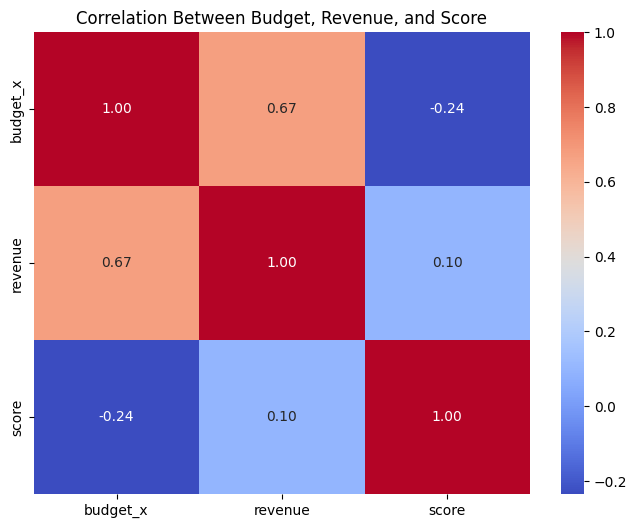

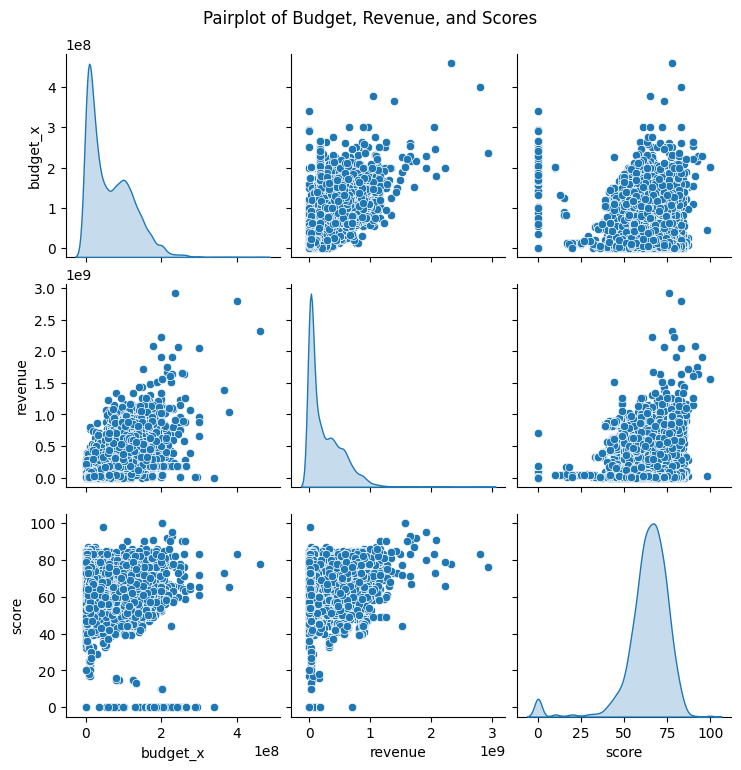

In [60]:
#multivariate budget, revenue and score relationship
# Select relevant columns
num_cols = df[["budget_x", "revenue", "score"]]
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Budget, Revenue, and Score")
plt.show()
# Pairplot for scatter distributions
sns.pairplot(num_cols, diag_kind="kde")
plt.suptitle("Pairplot of Budget, Revenue, and Scores", y=1.02)
plt.show()


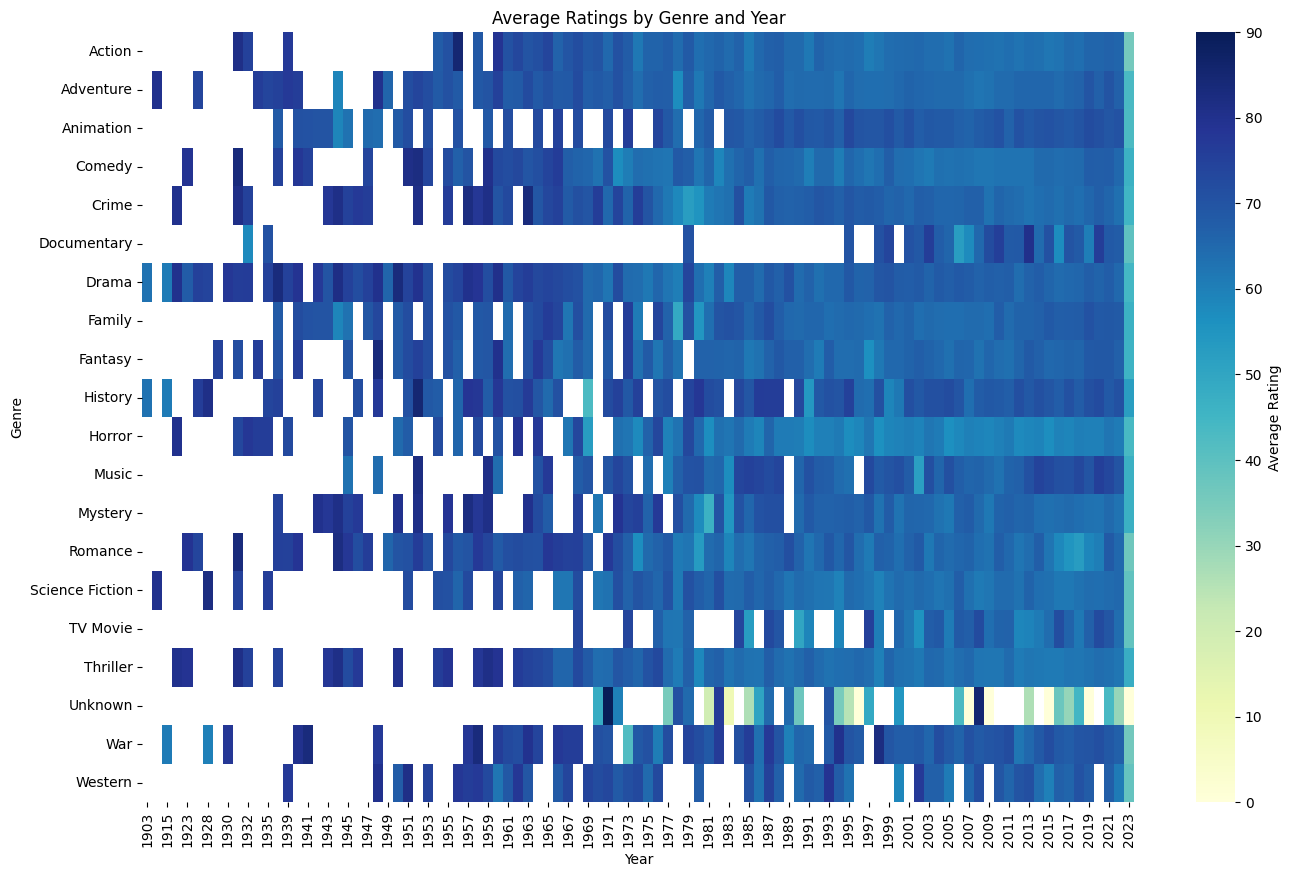

In [61]:
#Higher rated genre or release year

# Group by year & genre for avg rating
avg_rating_genre_year = df_genre.groupby(["year", "genre"])["score"].mean().reset_index()

# Pivot for heatmap
pivot_table = avg_rating_genre_year.pivot(index="genre", columns="year", values="score")

plt.figure(figsize=(16,10))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={"label": "Average Rating"})
plt.title("Average Ratings by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()

In [ ]:
# major insights 
# 1. most common genre: the top three(3) most frequent genre are drama(3,812 movies), comedy(2,943 movies), action(2,752 movies)
# 2. trend in ratings over time: 1900s - 1920s show mixed scores of movies: averaged rating is between 60-75, with some flunctuations depending on
    # era an genre
# 3. genre with the highest ratings: history 69.2, war 69.1, animation 69.0. These are top three(3) genres by average ratings.
# *this suggests that historical and war films tend to be more critically aclaimed than genres like action and comedy